In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath

from uncertainties import ufloat
from uncertainties import umath
from scipy.optimize import curve_fit
import scipy as sp
sns.set_theme(style="darkgrid")
sns.set_context("paper")

C:\Users\andri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


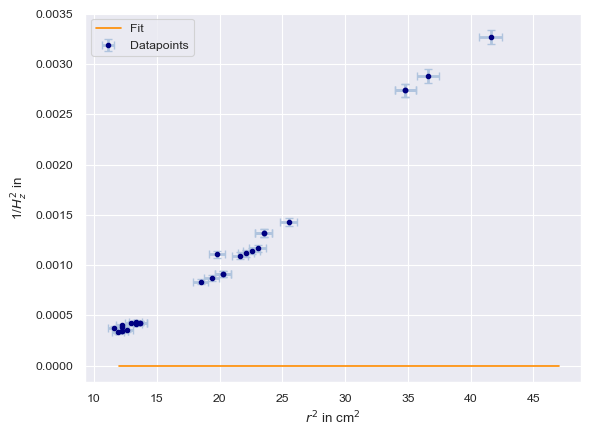

1.0


In [32]:
df=pd.read_csv("eRadius_U2494.csv")
d=np.ones(len(df["Durchmesser in  cm"])) * ufloat(1, 1)
I=np.ones(len(df["Stromstaerke in A"])) * ufloat(1, 1)
for i in range(len(d)):
    d[i] = ufloat(df["Durchmesser in  cm"][i], 0.14)
    I[i] = ufloat(df["Stromstaerke in A"][i], 0.001)
r=d/2
r2=r**2
U=ufloat(249.9, 0.1)
r_spule=ufloat(15, 0.14)
N=130
H=8*N*I/(np.sqrt(125)*r)
H2=1/(H**2)
mu0=1.256e-6
plt.errorbar([r2[i].n for i in range(len(r))], [H2[i].n for i in range(len(H))],
             xerr=[r2[i].s for i in range(len(r))], yerr=[H2[i].s for i in range(len(H))],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")

def Function1(r, em):
    return em*mu0**2*r**2/(2*U.n)

popt, pcov = curve_fit(Function1, [r[i].n for i in range(len(r))], [H2[i].n for i in range(len(r2))],
                       sigma=[H2[i].s for i in range(len(r2))])
em1=ufloat(popt[0], np.sqrt(pcov))
x_values=np.linspace(12, 47, 100)
plt.plot(x_values, Function1(x_values, popt[0]), color="darkorange", label="Fit")

plt.xlabel(r"$r^2$ in cm$^2$")
plt.ylabel(r"1/$H_z^2$ in ")
plt.legend()
plt.show()
print(popt[0])